## Forecasting Model Assignment: 

### Forecast the CocaCola prices data set. Prepare a document for  model explaining how many dummy variables you have created and RMSE value for  model. Finally which model you will use for Forecasting.

# 1. Importing Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import pyplot
import itertools

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import statsmodels.graphics.tsaplots as tsa_plots
import statsmodels.tsa.statespace as tm_models
from datetime import datetime,time

from pylab import rcParams
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

# 2. Import Data / Dataset:

In [3]:
df_cola = pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
df_cola.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


# 3. Data Understanding / Exploration / EDA:

## 3.1 Descriptive Analysis:

In [5]:
df_cola.shape

(42, 2)

In [6]:
df_cola.dtypes

Quarter     object
Sales      float64
dtype: object

In [7]:
df_cola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [8]:
df_cola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [9]:
df_cola.isnull().any()

Quarter    False
Sales      False
dtype: bool

In [10]:
df_cola.nunique()

Quarter    42
Sales      42
dtype: int64

In [12]:
df_cola[df_cola.duplicated()].shape

(0, 2)

In [13]:
df_cola[df_cola.duplicated()]

,Quarter,Sales


In [18]:
df_cola.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


## 3.2 Data Visualization:

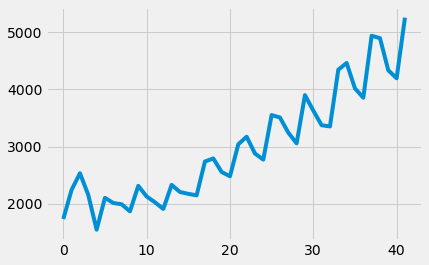

In [20]:
df_cola.Sales.plot()
plt.show()

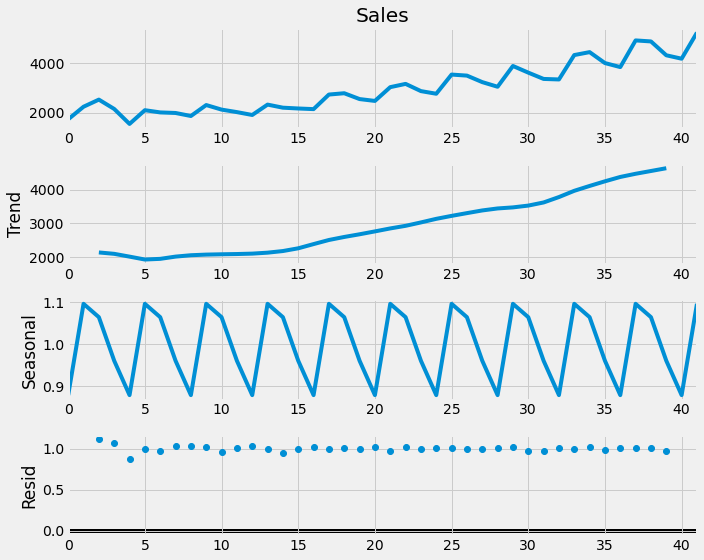

In [21]:
plt.rcParams['figure.figsize'] = 10,8
decomposition =seasonal_decompose(df_cola.Sales, model='mul', period= 4) # Additive Seasonal Index:
decomposition.plot()
plt.show()

# 4. Data preparation:

In [22]:
df_cola.head()
Quat = pd.Series(df_cola.Quarter)

In [23]:
quat=[]
for i in range (len(df_cola)):
    val= Quat[i]
    quat.append(val[0:2])
quat = pd.DataFrame({"quat":quat})
quat = pd.get_dummies(quat)

In [24]:
df_cola = pd.concat([df_cola, quat], axis=1)
df_cola.head()

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4
0,Q1_86,1734.827000,1,0,0,0
1,Q2_86,2244.960999,0,1,0,0
2,Q3_86,2533.804993,0,0,1,0
3,Q4_86,2154.962997,0,0,0,1
4,Q1_87,1547.818996,1,0,0,0


In [25]:
t= np.arange(1,43)
df_cola['t']=t
df_cola['t_square']=np.square(df_cola['t'])
df_cola.head()

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square
0,Q1_86,1734.827000,1,0,0,0,1,1
1,Q2_86,2244.960999,0,1,0,0,2,4
2,Q3_86,2533.804993,0,0,1,0,3,9
3,Q4_86,2154.962997,0,0,0,1,4,16
4,Q1_87,1547.818996,1,0,0,0,5,25


In [26]:
df_cola.head()

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square
0,Q1_86,1734.827000,1,0,0,0,1,1
1,Q2_86,2244.960999,0,1,0,0,2,4
2,Q3_86,2533.804993,0,0,1,0,3,9
3,Q4_86,2154.962997,0,0,0,1,4,16
4,Q1_87,1547.818996,1,0,0,0,5,25


In [27]:
df_cola["log_Sales"]=np.log(df_cola['Sales'])
df_cola.head()

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square,log_Sales
0,Q1_86,1734.827000,1,0,0,0,1,1,7.458663
1,Q2_86,2244.960999,0,1,0,0,2,4,7.716443
2,Q3_86,2533.804993,0,0,1,0,3,9,7.837477
3,Q4_86,2154.962997,0,0,0,1,4,16,7.675529
4,Q1_87,1547.818996,1,0,0,0,5,25,7.344602


# 5. Model Building:

In [28]:
# Train test Split:

train = df_cola.iloc[0:36]
test = df_cola.iloc[36:]

In [29]:
train.tail()

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square,log_Sales
31,Q4_93,3373.0,0,0,0,1,32,1024,8.123558
32,Q1_94,3352.0,1,0,0,0,33,1089,8.117312
33,Q2_94,4342.0,0,1,0,0,34,1156,8.376090
34,Q3_94,4461.0,0,0,1,0,35,1225,8.403128
35,Q4_94,4017.0,0,0,0,1,36,1296,8.298291


In [30]:
test

,Quarter,Sales,quat_Q1,quat_Q2,quat_Q3,quat_Q4,t,t_square,log_Sales
36,Q1_95,3854.0,1,0,0,0,37,1369,8.256867
37,Q2_95,4936.0,0,1,0,0,38,1444,8.504311
38,Q3_95,4895.0,0,0,1,0,39,1521,8.495970
39,Q4_95,4333.0,0,0,0,1,40,1600,8.374015
40,Q1_96,4194.0,1,0,0,0,41,1681,8.341410
41,Q2_96,5253.0,0,1,0,0,42,1764,8.566555


In [31]:
# linear model:

linear_model= smf.ols('Sales~t',data=train).fit()
pred1= linear_model.predict(test)
rsme1= np.sqrt(mean_squared_error(test.Sales, pred1))
rsme1

667.4256979280374

In [32]:
# Quadratic model:

quad_model=smf.ols('Sales~t+t_square',data=train).fit()
pred2 =  quad_model.predict(test)
rsme2= np.sqrt(mean_squared_error(test.Sales, pred2))
rsme2

485.1406702070246

In [33]:
# Exponential model:

expo_model=smf.ols('log_Sales~t',data=train).fit()
pred3= expo_model.predict(test)
pred3= np.exp(pred3)
rsme3= np.sqrt(mean_squared_error(test.Sales, pred3))
rsme3

526.7672615478397

In [34]:
# Additive seasonality:

add_model= smf.ols('Sales~ quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=train).fit()
pred4 = add_model.predict(test)
rsme4= np.sqrt(mean_squared_error(test.Sales, pred4))
rsme4

1895.5593132150468

In [41]:
# Additive seasonality with linear trend:

adlin_model= smf.ols('Sales~t+quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=train).fit()
pred5 = adlin_model.predict(test)
rsme5= np.sqrt(mean_squared_error(test.Sales, pred5))
rsme5

555.3404286757394

In [35]:
# Multiplicative seasonality with linear trend:

mul_lin=smf.ols('log_Sales~t+quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=train).fit()
pred6= mul_lin.predict(test)
pred6= np.exp(pred6)
rsme6= np.sqrt(mean_squared_error(test.Sales, pred6))
rsme6

323.2127536714597

In [36]:
# Multiplicative seasonality with quadratic trend:

mul_quad=smf.ols('log_Sales~t+t_square+quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=train).fit()
pred7= mul_quad.predict(test)
pred7= np.exp(pred7)
rsme7= np.sqrt(mean_squared_error(test.Sales, pred7))
rsme7

602.5095425122709

In [42]:
# Multiplicative seasonality:

mulsea=smf.ols('log_Sales~quat_Q1+quat_Q2+quat_Q3+quat_Q4',data=train).fit()
pred8= mulsea.predict(test)
pred8= np.exp(pred5)
rsme8= np.sqrt(mean_squared_error(test.Sales, pred5))
rsme8

555.3404286757394

In [43]:
rmse = pd.DataFrame({"Model":
                   ["linear_model", "quad_model","expo_model", "add_model","adlin_model","mul_lin", "mul_quad","mulsea"],
                   "RSME":
                    [rsme1, rsme2, rsme3, rsme4, rsme5, rsme6, rsme7, rsme8 ]})

In [44]:
rmse

,Model,RSME
0,linear_model,667.425698
1,quad_model,485.140670
2,expo_model,526.767262
3,add_model,1895.559313
4,adlin_model,555.340429
5,mul_lin,323.212754
6,mul_quad,602.509543
7,mulsea,555.340429


## Final Observation:

**As per the above all model values of RSME , multiplicative seasonality with linear trend model has the lowest value. So, it can be selected for future selection.